### Exercice 1: peindre la lettre H
Définissez une fonction qui reçoit en entrée une image RVB et une paire de coordonnées (ligne, colonne) et renvoie une copie de l'image d'origine avec une lettre verte H revêtue de dimensions spécifiques de l'image.

Les coordonnées montrent le coin supérieur gauche de H. L'épaisseur de la lettre doit être de 3 pixels et sa hauteur et sa largeur sont de 24 pixels.

Commencez par la norme suivante:

In [70]:
def draw_H(image, coords, color=(255, 0, 0)):
    out = image.copy()

    hauteur=24
    largeur=24
    epaisseur=3

    out[coords[0]:coords[0]+hauteur,coords[1]:coords[1]+epaisseur,0]=color[0]
    out[coords[0]:coords[0]+hauteur,coords[1]:coords[1]+epaisseur,1]=color[1]
    out[coords[0]:coords[0]+hauteur,coords[1]:coords[1]+epaisseur,2]=color[2]

    out[coords[0]:coords[0]+hauteur,coords[1]+largeur-epaisseur:coords[1]+largeur,0]=color[0]
    out[coords[0]:coords[0]+hauteur,coords[1]+largeur-epaisseur:coords[1]+largeur,1]=color[1]
    out[coords[0]:coords[0]+hauteur,coords[1]+largeur-epaisseur:coords[1]+largeur,2]=color[2]

    out[coords[0]+int(hauteur/2)-int(epaisseur/2):coords[0]+int(hauteur/2)+int(epaisseur/2)+1,coords[1]:coords[1]+largeur,0]=color[0]
    out[coords[0]+int(hauteur/2)-int(epaisseur/2):coords[0]+int(hauteur/2)+int(epaisseur/2)+1,coords[1]:coords[1]+largeur,1]=color[1]
    out[coords[0]+int(hauteur/2)-int(epaisseur/2):coords[0]+int(hauteur/2)+int(epaisseur/2)+1,coords[1]:coords[1]+largeur,2]=color[2]
    
    return out

Essayez votre programme avec le code suivant:

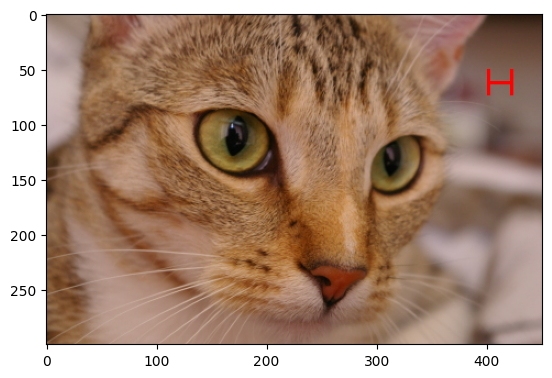

In [71]:
from skimage import data
import matplotlib.pyplot as plt

cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);



### Exercice 2: Imagerie des canaux RVB
Affichez les différents canaux de couleur de l'image (chacun comme une image d'échelle de gris).

Commencez par la norme suivante:

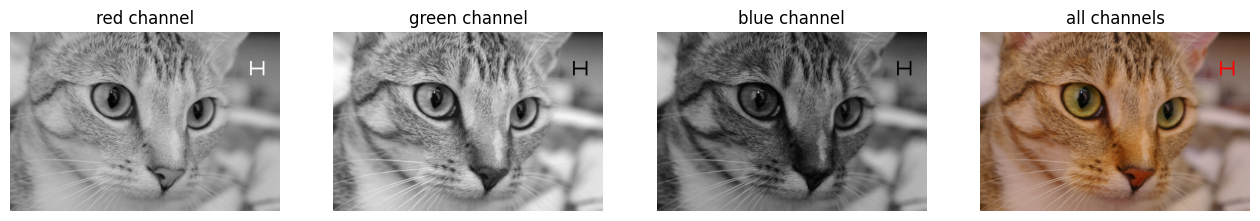

In [74]:
import numpy as np
# --- read in the image ---

image = plt.imread('image/balloon.jpg')

# --- assign each color channel to a different variable ---

r = cat_H[:,:,0]
g = cat_H[:,:,1]
b = cat_H[:,:,2]

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

### Exercice epaisseur: Conversion en une échelle de gris ("noir et blanc")
La luminosité relative d'une image est l'intensité de la lumière qui vient de chaque point.Différentes couleurs contribuent différemment à la luminosité: il est très difficile d'avoir par exemple une couleur bleu vif et propre.Ainsi, en commençant par une image RVB, sa luminosité est donnée par le type:

$$ y = 0,2126r + 0,7152g + 0,0722b $$


A) Utilisez la multiplication des tables pour convertir une image RVB en une image de luminosité de l'échelle de gris selon le type ci-dessus.

b) Changer les coefficients en 1/3 (c'est-à-dire prendre le canal rouge, vert et bleu moyen, et cette approche est comparée à la rgb2gray.

c) Comparez vos résultats de a) et b) avec ce que vous avez reçu avec le skimage.color.rgb2gray.ray.

Text(0.5, 1.0, 'my rgb2gray')

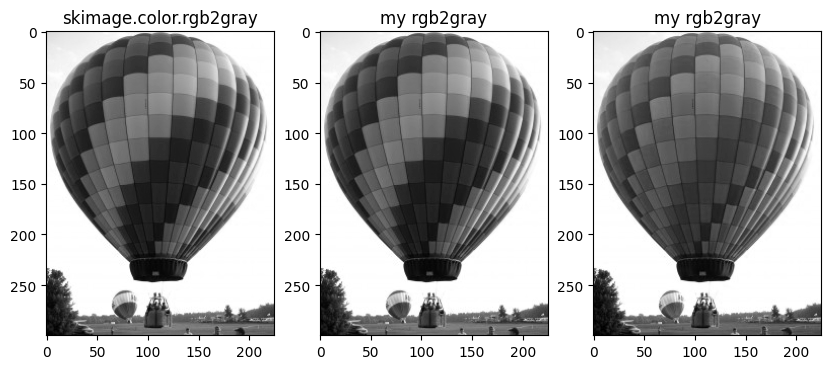

In [88]:
from skimage import color, img_as_float, io

image = img_as_float(io.imread('./image/balloon.jpg'))

gray = color.rgb2gray(image)
my_gray = image[:,:,0]*0.2126+image[:,:,1]*0.7152+image[:,:,2]*0.0722
my_gray_b = image[:,:,0]*0.3+ image[:,:,1]*0.3+ image[:,:,2]*0.3

# --- display the results ---

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')

ax2.imshow(my_gray_b, cmap='gray')
ax2.set_title('my rgb2gray')